In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (16, 8)
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 5000
# data_path
data_path = "../data"

# Goal: Given the text data (“complaint_text) provided by the users, to design ML algorithm, identify the “main-product” and “sub-product” they complained

## 1. simple explorary data analysis(EDA)
<ul>
<li>load data</li>
<li>check missing values</li>
<li>Obeserve disstibution of MAIN_PRODUCT and SUP_PRODUCT </li>
</ul>

## 2. How do I do cope our goal?
<ul>
<li>formulate the goal into multi-class classificaiton</li>
<li>observer class distribution</li>
<li>obeserve number of clss v.s. coverage to determine should we use all products</li>
<li>example</li>
</ul>

## 3. text field exploring(model's input)?
<ul>
<li>check frequent token in our text corpus</li>
<li>the way we preprocess text data</li>
<li>obeserve complaint length distribution</li>
</ul>

### load data

In [2]:
# load data
complaints_users = pd.read_csv(os.path.join(data_path,"complaints_users.csv"))
complaints_companies = pd.read_csv(os.path.join(data_path,"complaints_companies.csv"))
issues = pd.read_csv(os.path.join(data_path,"issues.csv"))
products = pd.read_csv(os.path.join(data_path,"products.csv"))
# data porcessing
complaints_users.rename(columns = {"DATE":"DATE_USER_SUBMITTED"}, inplace = True)
complaints_companies.rename(columns = {"DATE":"DATE_CO_RECEIVED"}, inplace = True)

/Users/yunruili/revolut/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print ("# of rows : {}".format(len(complaints_companies)))
print ("# of rows : {}".format(len(complaints_users)))
print ("# of rows : {}".format(len(issues)))
print ("# of rows : {}".format(len(products)))

# of rows : 383066
# of rows : 383066
# of rows : 353
# of rows : 98


### ISSUE_ID

In [4]:
assert issues.ISSUE_ID.nunique() == len(issues), "ISSUE_ID is duplicated" 
print ("# of main-issues : {}".format(issues.MAIN_ISSUE.nunique()))
print ("# of sub-issues : {}".format(issues.SUB_ISSUE.nunique()))
issues.head()

# of main-issues : 161
# of sub-issues : 215


ISSUE_ID  \
0       253   
1       165   
2        18   
3       349   
4       300   

                                                                         MAIN_ISSUE  \
0  Problem with a credit reporting company's investigation into an existing problem   
1                                              Incorrect information on your report   
2                                                 Attempts to collect debt not owed   
3                                                   Written notification about debt   
4                                                     Struggling to repay your loan   

                                                 SUB_ISSUE  
0  Their investigation did not fix an error on your report  
1                                 Account status incorrect  
2                                            Debt was paid  
3         Didn't receive enough information to verify debt  
4  Can't get other flexible options for repaying your loan

### PRODUCT_ID

In [5]:
assert products.PRODUCT_ID.nunique() == len(products), "PRODUCT_ID is duplicated" 
print ("# of main-products : {}".format(products.MAIN_PRODUCT.nunique()))
print ("# of sub-products : {}".format(products.SUB_PRODUCT.nunique()))

products.head()

# of main-products : 18
# of sub-products : 75


PRODUCT_ID  \
0          26   
1          37   
2          39   
3          90   
4          42   

                                                                   MAIN_PRODUCT  \
0  Credit reporting, credit repair services, or other personal consumer reports   
1                                                               Debt collection   
2                                                               Debt collection   
3                                                                  Student loan   
4                                                               Debt collection   

                      SUB_PRODUCT  
0                Credit reporting  
1                    Medical debt  
2                   Mortgage debt  
3  Federal student loan servicing  
4                      Other debt

# check missing values
## &emsp;  We found: there is 3 missing value in SUB_PRODUCT(that's we care in this project)

In [6]:
total = products.isnull().sum().sort_values(ascending = False)
percent = (products.isnull().sum()/products.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()
# there is 3 missing value in SUB_PRODUCT

SUB_PRODUCT  MAIN_PRODUCT  PRODUCT_ID
Total       3.000000           0.0         0.0
Percent     3.061224           0.0         0.0

In [7]:
# find missing sub porduct
products[products.SUB_PRODUCT.isnull()]

PRODUCT_ID      MAIN_PRODUCT SUB_PRODUCT
51          23       Credit card         NaN
52          28  Credit reporting         NaN
71          80       Payday loan         NaN

In [8]:
# manually filled up subproduct with his main product
products.set_value(51, 'SUB_PRODUCT', "Credit card")
products.set_value(52, 'SUB_PRODUCT', "Credit reporting")
products.set_value(71, 'SUB_PRODUCT', "Payday loan")
assert len(products[products.SUB_PRODUCT.isnull()]) == 0, "still have missing value"

/Users/yunruili/revolut/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/yunruili/revolut/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yunruili/revolut/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [9]:
# complaints_users
total = complaints_users.isnull().sum().sort_values(ascending = False)
percent = (complaints_users.isnull().sum()/complaints_users.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

WAS_USER_DISPUTED  ISSUE_ID  PRODUCT_ID  DATE_USER_SUBMITTED  \
Total        218990.000000       0.0         0.0                  0.0   
Percent          57.167694       0.0         0.0                  0.0   

         COMPLAINT_TEXT  COMPLAINT_ID  
Total               0.0           0.0  
Percent             0.0           0.0

In [10]:
# complaints_users
total = complaints_companies.isnull().sum().sort_values(ascending = False)
percent = (complaints_companies.isnull().sum()/complaints_companies.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

COMPANY_RESPONSE_TO_PUBLIC  COMPANY_RESPONSE_TO_USER  \
Total                 200563.000000                  4.000000   
Percent                   52.357296                  0.001044   

         DATE_CO_RECEIVED  WAS_RESPONSE_TIMELY  COMPANY  COMPLAINT_ID  
Total                 0.0                  0.0      0.0           0.0  
Percent               0.0                  0.0      0.0           0.0

### merge 

In [11]:
df = pd.merge(complaints_users,complaints_companies, on = "COMPLAINT_ID") \
       .merge(products, on = "PRODUCT_ID") \
       .merge(issues, on = "ISSUE_ID")
df = df[["COMPLAINT_TEXT","MAIN_PRODUCT","SUB_PRODUCT"]]

In [12]:
df.sample(3)

COMPLAINT_TEXT  \
124220                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  I have made multiple attempts to obtain the legal supporting documentation to provide proof that the account LVNV Funding is reporting on my credit profile belongs to me. This company continues to ignore my certified requests. They 've verify with the credit bureaus that the account they are reporting is accurate ; however, they 've refused to supply the substantiating documentation.   
17335                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Ive had 2 loan modifications in XXXX and one in XXXX. The account now shows current but the history still shows XXXX days past due. Part of the modification process is to bring the account current and Im doing so the credit history for that time was supposed to be updated to show current. Under the laws of the FCRA this accounts history isnt being reported properly and it is adversely affecting my credit and score. Please remediate.   
199108  We changed homeowner insurance companies in XX/XX/XXXX. Navy Federal was notified immediately. The annual premium for the new company was paid in full by me, by check, check # XXXX, at the time the new policy was taken out. Navy Federal, however, went ahead and paid the old company a new annual premium after being notified that we were not going to renew the policy. I notified the old company that the refund should be sent to me since I had paid the premium in full for the new policy. I sent Navy Federal a copy of the canceled check proving the payment in full. They feel the refund from the old insurance company is theirs to keep and I was out of line to claim it. I have requested an escrow analysis. I keep getting verbal analysis that change daily. Friday, XX/XX/XXXX, I had a surplus of {$360.00}, today, XX/XX/XXXX, I have an overage of {$39.00}. ( Nothing has been paid out. ) How does it fluctuate so dramicatically? ) When I question that, I am told that they are not going to talk to m

# Disstibution of MAIN_PRODUCT 
## &emsp;  We found: Top3 MAIN product that is complaint: 'Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage'

In [13]:
# disstibution of MAIN_PRODUCT 
print ("# of main-product existed in outr training sample : {}".format(df.MAIN_PRODUCT.nunique()))
df.MAIN_PRODUCT.value_counts(normalize = True)

# of main-product existed in outr training sample : 18


Credit reporting, credit repair services, or other personal consumer reports    0.240729
Debt collection                                                                 0.225940
Mortgage                                                                        0.138188
Credit reporting                                                                0.082461
Student loan                                                                    0.056854
Credit card or prepaid card                                                     0.055716
Credit card                                                                     0.049177
Bank account or service                                                         0.038858
Checking or savings account                                                     0.033566
Consumer Loan                                                                   0.024732
Vehicle loan or lease                                                           0.014958
Money transfer, virtu

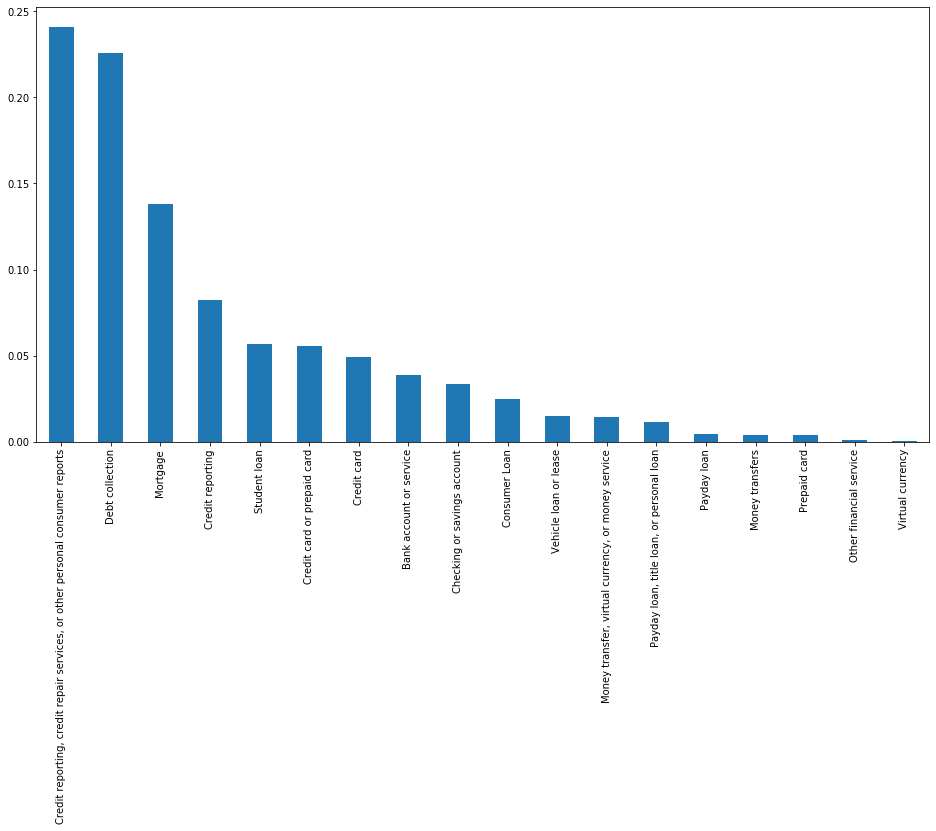

In [14]:
df.MAIN_PRODUCT.value_counts(normalize = True).plot(kind = "bar")

# disstibution of SUB_PRODUCT 
## &emsp; Top3 Sub product that is complaint: Credit reporting,  Credit card, Checking account

In [15]:
# disstibution of SUB_PRODUCT 
print ("# of sub-product existed in outr training sample : {}".format(df.SUB_PRODUCT.nunique()))
df.SUB_PRODUCT.value_counts(normalize = True)

# of sub-product existed in outr training sample : 75


Credit reporting                              0.317392
Credit card                                   0.068808
Checking account                              0.054356
I do not know                                 0.044084
General-purpose credit card or charge card    0.042403
Conventional fixed mortgage                   0.038014
Other debt                                    0.034942
Other (i.e. phone, health club, etc.)         0.032352
Federal student loan servicing                0.031686
Conventional home mortgage                    0.031585
Credit card debt                              0.026160
FHA mortgage                                  0.025552
Medical debt                                  0.020605
Medical                                       0.018248
Non-federal student loan                      0.016804
Payday loan                                   0.013674
Vehicle loan                                  0.013421
Conventional adjustable mortgage (ARM)        0.012987
Installmen

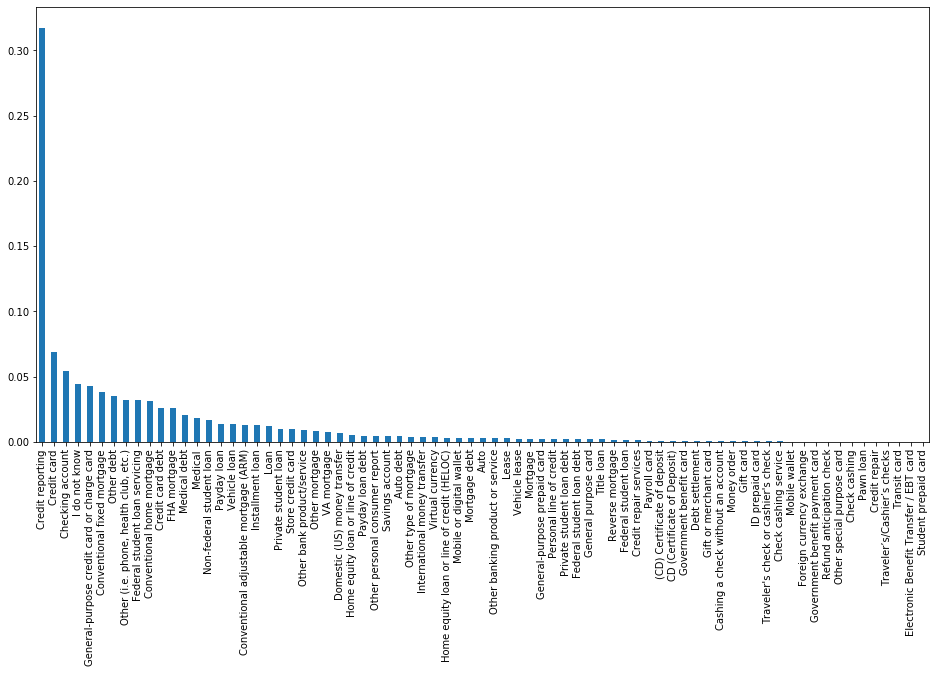

In [16]:
df.SUB_PRODUCT.value_counts(normalize = True).plot(kind = "bar")

# Formulate this problme into multi-class classification
## &emsp;Genearte multi-class label
### &emsp;&emsp;&emsp;We append main-product into each sub-product as our unique ground truth(generate lable)

# Note
### &emsp;&emsp;&emsp;The reason we append is to cope with a situation thata a one sub-product might have two or more different main product

In [17]:
# get label mapping
concatenate_token = "-[CON]-"
products["class_label"] = [m+concatenate_token+s for m, s in zip(products.MAIN_PRODUCT, products.SUB_PRODUCT)]

# label generation
id_to_sub_product = {i:v for i,v in enumerate(products.class_label.unique())}
id_to_sub_product_inv = {v:i for i,v in id_to_sub_product.items()}

df["class_label_str"] = [m+concatenate_token+s for m, s in zip(df.MAIN_PRODUCT, df.SUB_PRODUCT)]
df["class_label"] = df.class_label_str.apply(lambda x : id_to_sub_product_inv[x])

print ("Total number of class : {}".format(df["class_label"].nunique()))

Total number of class : 98


In [18]:
products.sample(5)

PRODUCT_ID             MAIN_PRODUCT                   SUB_PRODUCT  \
90          71  Other financial service     Foreign currency exchange   
92          96         Virtual currency  Domestic (US) money transfer   
83          86             Prepaid card                 Mobile wallet   
16          61                 Mortgage                  FHA mortgage   
88          89             Prepaid card                  Transit card   

                                                class_label  
90  Other financial service-[CON]-Foreign currency exchange  
92      Virtual currency-[CON]-Domestic (US) money transfer  
83                         Prepaid card-[CON]-Mobile wallet  
16                              Mortgage-[CON]-FHA mortgage  
88                          Prepaid card-[CON]-Transit card

# label distribution

## &emsp; label is quite imbalanced, not suprisingly


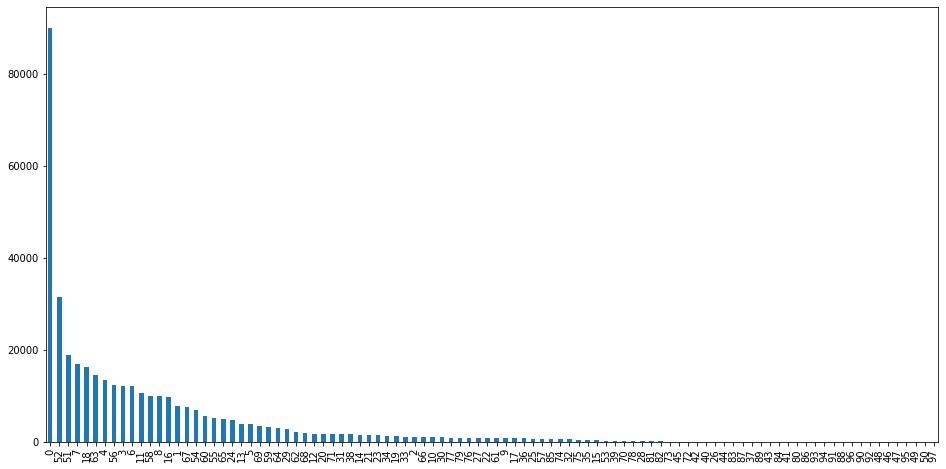

In [19]:
# label distribution
df["class_label"].value_counts().plot(kind = "bar")

# observe number of products vs coverage
### &emsp;  Top 5  products already is nearly 50% of coverage
### &emsp;  Top 15 products already pass 80% of coverage
### &emsp;  Top 20 products already pass 90% of coverage
### &emsp;  Top 50 products already pass 99% of coverage

# Note
### &emsp;&emsp;&emsp; 1.products = main+sub product(unique)
### &emsp;&emsp;&emsp; 2.trade-off between coverage and # of unique product our classification model want to cover.
### &emsp;&emsp;&emsp; 3.the reason we do that is ask ourself should our model need toconsider or cover all product?
### &emsp;&emsp;&emsp; 4.the vertical is coverage rate, the horizantal is top N frequent product class

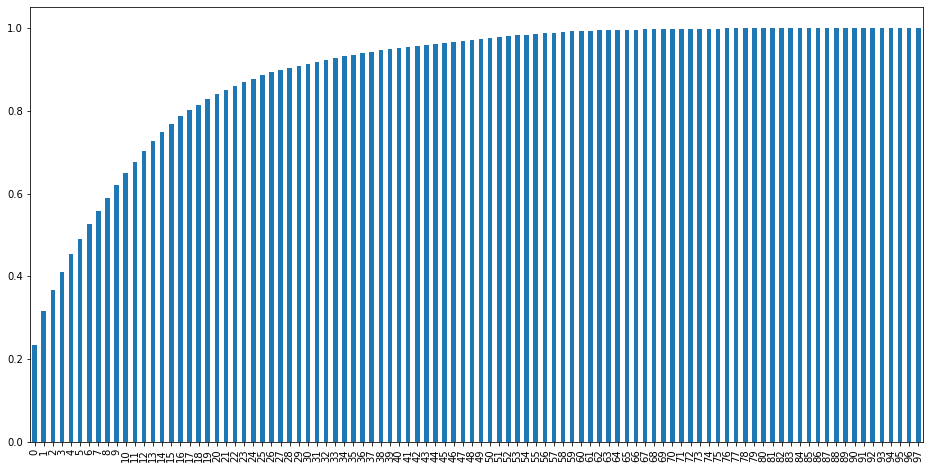

In [20]:
# number of products vs coverage
pd.Series(df.class_label.value_counts(normalize = True).cumsum().values).plot(kind = "bar")

##  N+1(others) class, where N is top N unique product our model cover and 1 representing others out of top N.
### &emsp;&emsp;&emsp; For example, if N is 50, our number of class is 50+1 = 51, please refer to below.

In [28]:
# example
import pickle
concatenate_token = "-[CON]-"

# Unpickling (de-serializing) a dictionary
with open('../code/asset/id_to_main_sub.pickle', 'rb') as filename:
    id_to_main_sub = pickle.load(filename)
id_to_main_sub

{0: 'Credit reporting, credit repair services, or other personal consumer reports-[CON]-Credit reporting',
 1: 'Credit reporting-[CON]-Credit reporting',
 2: 'Credit card-[CON]-Credit card',
 3: 'Debt collection-[CON]-I do not know',
 4: 'Credit card or prepaid card-[CON]-General-purpose credit card or charge card',
 5: 'Mortgage-[CON]-Conventional fixed mortgage',
 6: 'Debt collection-[CON]-Other debt',
 7: 'Debt collection-[CON]-Other (i.e. phone, health club, etc.)',
 8: 'Student loan-[CON]-Federal student loan servicing',
 9: 'Mortgage-[CON]-Conventional home mortgage',
 10: 'Checking or savings account-[CON]-Checking account',
 11: 'Bank account or service-[CON]-Checking account',
 12: 'Debt collection-[CON]-Credit card debt',
 13: 'Mortgage-[CON]-FHA mortgage',
 14: 'Debt collection-[CON]-Medical debt',
 15: 'Debt collection-[CON]-Credit card',
 16: 'Debt collection-[CON]-Medical',
 17: 'Student loan-[CON]-Non-federal student loan',
 18: 'Consumer Loan-[CON]-Vehicle loan',
 19: '

# check frequent token in our text corpus
### &emsp;  1.Check out most commont token
### &emsp;  2.visualization for better understanding of our text text, considering freq instaed of rank


In [22]:
from pytorch_pretrained_bert import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# step 1
from collections import Counter

all_tokens = []
for text in df.COMPLAINT_TEXT.sample(10000):
    for token in tokenizer.tokenize(text):
        all_tokens.append(token)
Counter(all_tokens).most_common(10)

Loading BERT tokenizer...


[('xx', 130005),
 ('.', 106508),
 ('##xx', 105108),
 ('the', 81965),
 ('i', 73560),
 ('to', 67502),
 ('and', 53646),
 (',', 53617),
 ('my', 40212),
 ('a', 39616)]

(-0.5, 399.5, 199.5, -0.5)

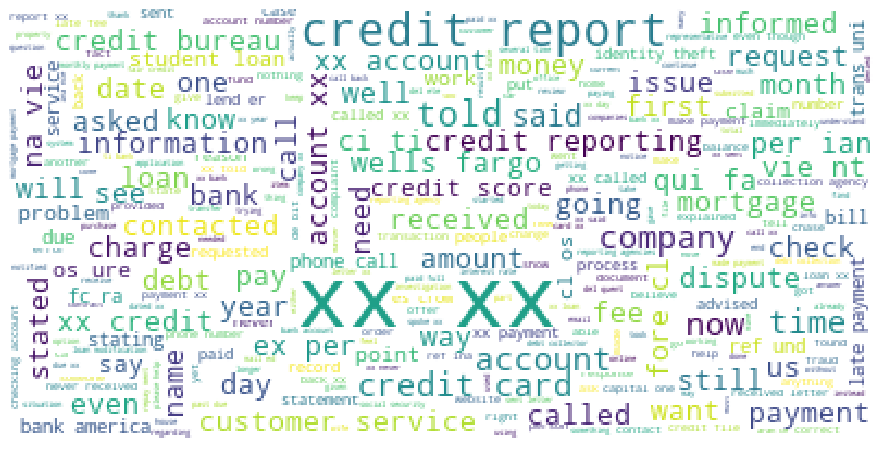

In [23]:
# step 2
from wordcloud import WordCloud

# Read the whole text.
s=" ".join(all_tokens)
text = s

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt


# take relative word frequencies into account instead of their rank, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(all_tokens),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

# How I pre-process text ?
## &emsp; Here, I won't do tranditional text cleaning usually in combination with ML algorithm such as removing stopwords, stemming, lemmatization. Because the BERT model I used in this project, 
#### &emsp;  1.) his nature of pre-trained language way, they don't do too many cleaning on his raw text, it will hurt them to learn contextual information.
#### &emsp;  2.) BERT model has a specific, fixed vocabulary 
#### &emsp;  3.) BERT tokenizer has a particular way of handling out-of-vocabulary words. (sentence piece tokenziation)

# Is text clean?
### &emsp; Yes, it's pretty dirty and has masked token in each sentence prob due to privacy.


# Complaint text length distribution 
# Note
### &emsp;&emsp;&emsp; 1. complaint text is quite long not likt simple sentence, but a document
### &emsp;&emsp;&emsp; 2.we need a way to cope with text length longer than 512 because the maximum sequence length of BERT, the model I mainly used in the project is 512.

In [24]:
# tokenize
complaint_token_len = pd.Series([len(tokenizer.tokenize(text)) for text in df.COMPLAINT_TEXT.sample(5000)])

print ("max length : {}".format(complaint_token_len.max()))
print ("min length : {}".format(complaint_token_len.min()))
print ("median length : {}".format(complaint_token_len.median()))


max length : 5753
min length : 3
median length : 170.0


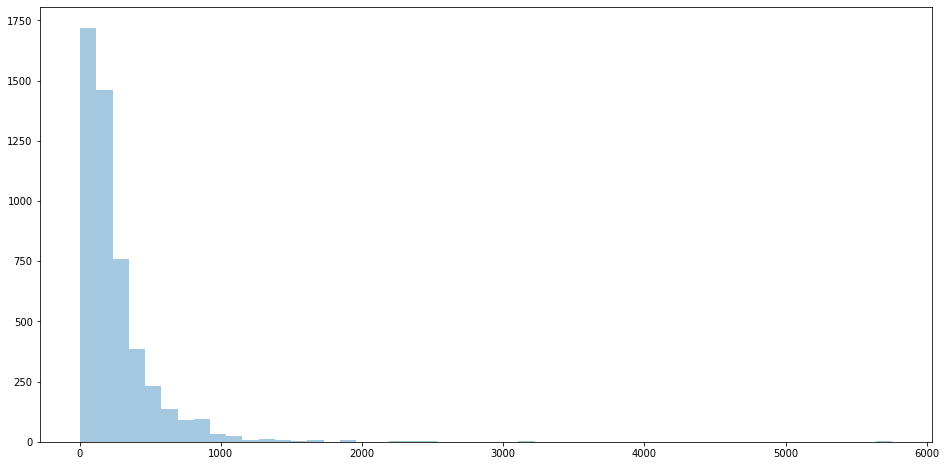

In [25]:
# visualize: complaint length distribution
sns.distplot(complaint_token_len, kde = False)